In [1]:
# mengimport library panda dan datasetnya

import pandas as pd

data = pd.read_csv('reviews.csv')
data = data.head(10000)
data.tail()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
9995,2022-06-17 09:34:24,Please make sure that the panels don't lag on ...,3,0,NaN
9996,2022-06-17 09:32:57,"This app has become a problem, why do you alwa...",1,0,NaN
9997,2022-06-17 09:20:21,"The app is good, but the lyric won't show for ...",5,0,NaN
9998,2022-06-17 09:17:26,Good App..Doesn't have ads between songs and h...,4,0,NaN
9999,2022-06-17 09:14:54,Impossible to use on lock screen anymore. Trie...,2,0,NaN


In [2]:
# menghitung jumlah data yang kosong

data.isnull().sum()

Time_submitted       0
Review               0
Rating               0
Total_thumbsup       0
Reply             9979
dtype: int64

In [3]:
# menghapus kolom time_submitted dan reply

data.drop(['Time_submitted', 'Reply'], axis=1, inplace=True)
data.isnull().sum()

Review            0
Rating            0
Total_thumbsup    0
dtype: int64

<AxesSubplot: xlabel='Rating', ylabel='count'>

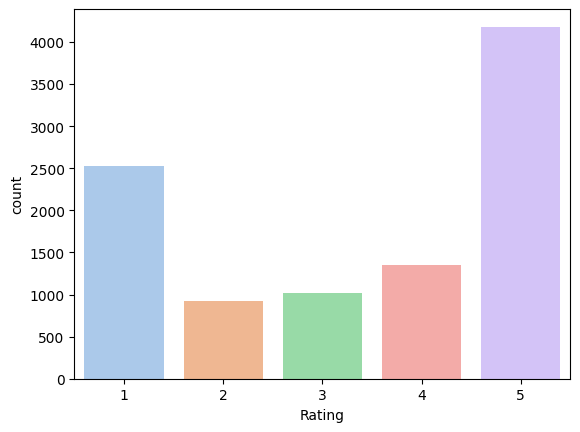

In [4]:
# mengimport library seaborn

import seaborn as sns
sns.countplot(x='Rating', data=data, palette='pastel')

In [5]:
# membuat kondisional untuk sentimentnya

def transform_ratings(rating):
    if rating == 5 or rating == 4:
        return "Good"
    if rating == 3:
        return "Natural"
    if rating == 2 or rating == 1:
        return "Bad"

,Review,Rating,Total_thumbsup,Desc,length
0,"Great music service, the audio is high quality...",5,2,Good,112
1,Please ignore previous negative rating. This a...,5,1,Good,86
2,"This pop-up ""Get the best Spotify experience o...",4,0,Good,106
3,Really buggy and terrible to use as of recently,1,1,Bad,47
4,Dear Spotify ... why do I get songs that I di...,1,1,Bad,105


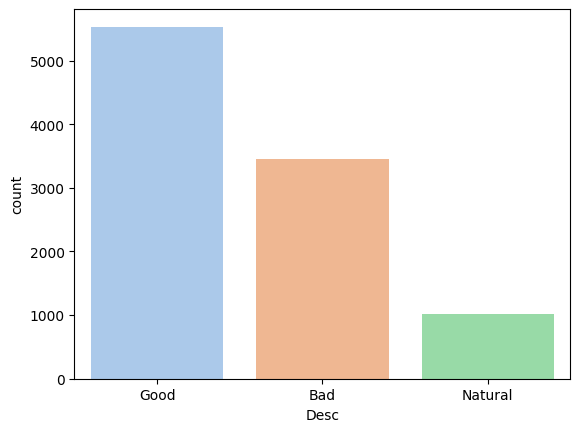

In [6]:
# membuat kolom baru bernama desc lalu membuat plot untuk mempresentasikan jumlah sentiment yang 
# good, bad, neutral. 

data['Desc'] = data['Rating'].apply(transform_ratings)
data['length'] = data['Review'].str.len()
sns.countplot(x='Desc', data=data, palette='pastel')
data.head()

<AxesSubplot: xlabel='length', ylabel='Total_thumbsup'>

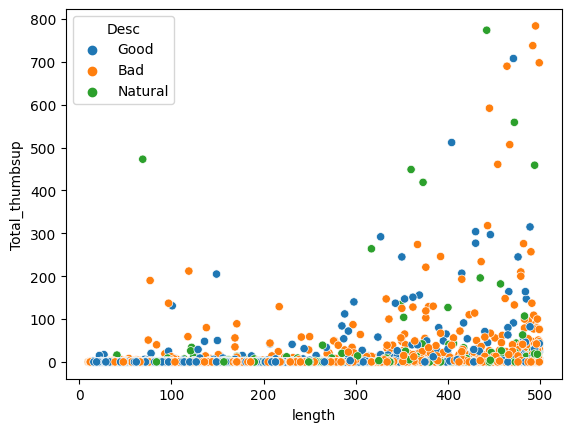

In [7]:
# membuat scatterplot untuk melihat pembagian panjang dan jumlah likenya

sns.scatterplot(x=data['length'][data.length < 500], 
y=data['Total_thumbsup'][data.Total_thumbsup < 800], 
hue=data['Desc'])

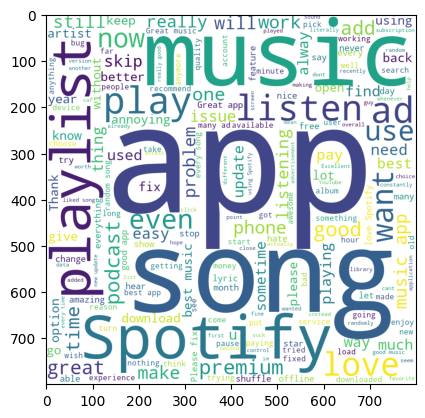

In [8]:
# mengimport library wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = " ".join(data.loc[:,'Review'])
wordcloud = WordCloud(width=800,height=800,background_color='white',min_font_size=10).generate(reviews)
plt.imshow(wordcloud)

In [9]:
# mengimport library nltk dan melakukan text processing pada kolom review

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda x:" ".join(x.lower() for x in x.split()))
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))

stop_words = stopwords.words('english')
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))

stemmer = PorterStemmer()
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word: " ".join(stemmer.stem(word) for word in word.split()))

data.head()["Review"]

0    great music servic audio high qualiti app easi...
1    pleas ignor previou neg rate app super great g...
2    pop-up get best spotifi experi android 12 anno...
3                      realli buggi terribl use recent
4    dear spotifi get song didnt put playlist shuff...
Name: Review, dtype: object

In [10]:
# menentukan parameter x dan y untuk proses training dan bagi data menjadi data training dan data testing.

from sklearn.model_selection import train_test_split
X = data['Review']
y = data['Desc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500,), (2500,), (7500,), (2500,))

In [11]:
# menggunakan teknik label encoder untuk mengubah value dalam class desc menjadi numerical format

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train

array([2, 1, 1, ..., 0, 1, 1])

In [12]:
# melakukan vectorisasi dataframes menggunakan 2 teknik yaitu count dan TFIDF Vectorizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)
print(X_train_count)

  (0, 299)	1
  (0, 2981)	1
  (0, 3289)	1
  (0, 3844)	1
  (0, 3859)	1
  (0, 4729)	1
  (0, 5539)	1
  (1, 529)	1
  (1, 1982)	1
  (1, 3101)	1
  (1, 3598)	1
  (1, 3768)	1
  (1, 4847)	1
  (2, 1786)	1
  (2, 1902)	1
  (2, 2307)	1
  (2, 3380)	1
  (3, 9)	1
  (3, 723)	1
  (3, 2273)	1
  (3, 2923)	1
  (3, 3006)	1
  (3, 3654)	1
  (3, 3767)	1
  (3, 3774)	1
  :	:
  (7497, 3465)	1
  (7497, 3570)	1
  (7497, 3573)	1
  (7497, 3611)	1
  (7497, 3938)	1
  (7497, 4014)	2
  (7497, 4149)	1
  (7497, 4582)	2
  (7497, 4714)	1
  (7497, 4767)	1
  (7497, 5131)	1
  (7497, 5290)	1
  (7497, 5329)	1
  (7497, 5539)	2
  (7497, 5664)	1
  (7497, 5734)	2
  (7497, 5767)	1
  (7497, 5801)	1
  (7497, 5870)	1
  (7498, 814)	1
  (7498, 3859)	1
  (7498, 4729)	1
  (7499, 682)	1
  (7499, 3907)	1
  (7499, 4916)	1


In [13]:
# proses TFIDF Vectorizer yang akan digunakan untuk melatih model

tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf)

  (0, 7348)	0.13998527728421514
  (0, 7345)	0.13882846041589678
  (0, 7265)	0.15116956916341734
  (0, 7236)	0.08970963096465402
  (0, 6790)	0.12453918940314032
  (0, 6785)	0.07765607498653049
  (0, 6283)	0.11686124253273503
  (0, 6256)	0.05746858476459464
  (0, 6194)	0.06821481618603226
  (0, 6179)	0.16004645753669275
  (0, 6178)	0.13236414529866256
  (0, 6151)	0.09399398697710191
  (0, 6140)	0.08175886831011395
  (0, 6033)	0.12852871083938028
  (0, 6032)	0.09765876418103521
  (0, 5962)	0.25456314376976424
  (0, 5933)	0.11127166967239097
  (0, 5472)	0.1968261581053942
  (0, 5470)	0.17557490491455607
  (0, 5172)	0.09343138821653749
  (0, 5162)	0.07034726621146428
  (0, 4794)	0.09202083072692055
  (0, 4793)	0.08652485117887716
  (0, 4559)	0.23304005324516164
  (0, 4547)	0.11998495411873808
  :	:
  (7499, 6194)	0.15457965891391554
  (7499, 5491)	0.19223630242388257
  (7499, 5488)	0.11126303887806895
  (7499, 5071)	0.19309546132643873
  (7499, 5067)	0.1283860115136349
  (7499, 4316)	0.1614

In [14]:
# mengimport random forest classifier dan melatih data trainnya

from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier()
rf1.fit(X_train_count, y_train)
rf_cv = rf1.score(X_test_count, y_test)
print(f'Random forest classifier on count vectors: {rf_cv}')

Random forest classifier on count vectors: 0.7696


In [15]:
# membandingkan hasilnya apabila menggunakan kombinasi random forest dengan TFIDF Vectorizer

rf2 = RandomForestClassifier()
rf2.fit(X_train_tfidf, y_train)
rf_tfidf = rf2.score(X_test_tfidf, y_test)
print(f'Random forest classifier on TF-IDF: {rf_tfidf}')

Random forest classifier on TF-IDF: 0.7524


In [16]:
# train dataframe menggunakan multinomial naive bayes yang dikombinasikan dengan count dan TDIDF Vectorization.

from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()
mnb1.fit(X_train_count, y_train)
mnb_cv = mnb1.score(X_test_count, y_test)
print(f'M Naive Bayes Classifier on CV: {mnb_cv}')

M Naive Bayes Classifier on CV: 0.7732


In [17]:
# membandingkan multinomial naive bayes dengan kombinasi TDIDF Vectorizer

mnb2 = MultinomialNB()
mnb2.fit(X_train_tfidf, y_train)
mnb_tfidf = mnb2.score(X_test_tfidf, y_test)
print(f'M Naive Bayes Classifier on TF-IDF: {mnb_tfidf}')

M Naive Bayes Classifier on TF-IDF: 0.7604


In [18]:
# membuat dataframe baru untuk membandingkan hasil accuracy score dari beberapa algoritma yang
# sudah dicoba sebelumnya

model = {'Model':['RF-Count', 'RF-TFIDF', 'MNB-Count', 'MNB-TFIDF'],
         'Score':[rf_cv, rf_tfidf, mnb_cv, mnb_tfidf]
         }
model_df = pd.DataFrame(model)
model_df

,Model,Score
0,RF-Count,0.7696
1,RF-TFIDF,0.7524
2,MNB-Count,0.7732
3,MNB-TFIDF,0.7604


<AxesSubplot: xlabel='Score', ylabel='Model'>

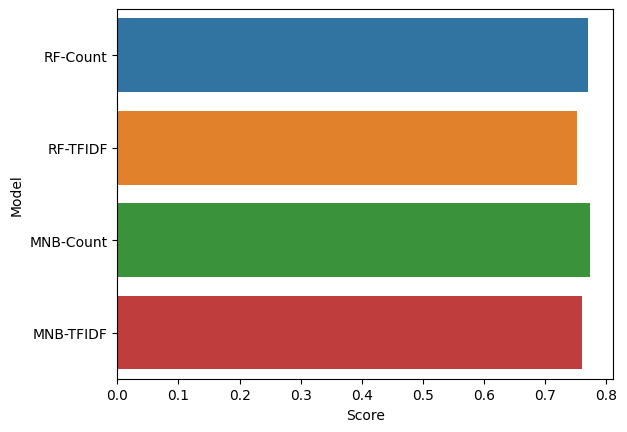

In [19]:
# membuat barplot untuk melihat visualisasi perbedaannya.

sns.barplot(data=model_df, y='Model',x='Score')

Text(0.5, 1.0, 'Confusion Matrix M NaiveBayes-Count')

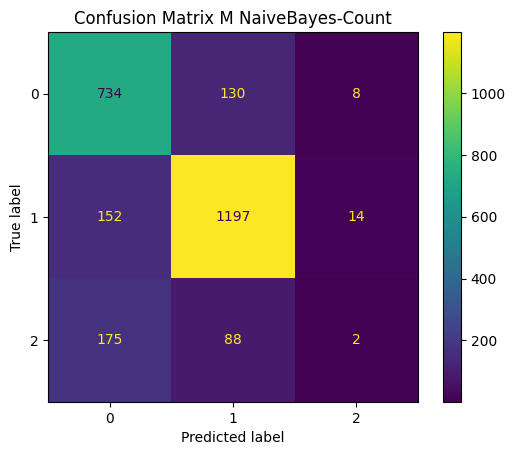

In [20]:
# perbandingan hasil prediksi klasifikasi model dengan hasil yang sesungguhnya menggunakan
# confusion matrix.

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(mnb1, X_test_count, y_test)
disp.ax_.set_title("Confusion Matrix M NaiveBayes-Count")

In [21]:
# menyimpan model dengan nilai accuracy paling tinggi menggunakan library pickle

import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(mnb1, f)
with open('transformer.pkl', 'wb') as f:
    pickle.dump(cv, f)
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f)

In [22]:
# membuat list yang berisikan kalimat untuk dianalisis sentimentnya. Lalu kita prediksi menggunakan
# model yang sudah dibuat.

test_reviews = ['This is a great app!', 
                'No control options from my phones',
                'I like the song selection, but the ads are annoying', 
                'bad ui']
pred = mnb1.predict(cv.transform(test_reviews))
pred_transformed = le.inverse_transform(pred).tolist()

In [23]:
# membuat dataframes baru yang berisi 2 kolom yaitu kalimat reviews dan hasil analisis sentimentnya

result = pd.DataFrame({'Reviews':test_reviews,
                       'Outcome':pred_transformed})
result

,Reviews,Outcome
0,This is a great app!,Good
1,No control options from my phones,Bad
2,"I like the song selection, but the ads are ann...",Natural
3,bad ui,Bad


<AxesSubplot: xlabel='Outcome', ylabel='count'>

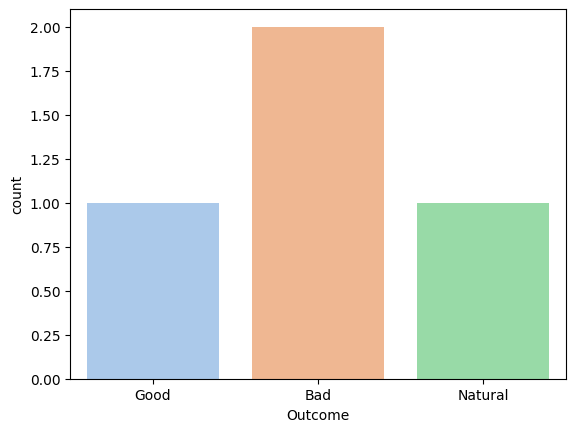

In [24]:
# membuat diagram batang untuk melihat berapa banyak total data dari masing-masing classes outcome

sns.countplot(x='Outcome', data=result, palette='pastel')